In [ ]:
# from google.colab import drive
# drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv('Training_20000.csv',error_bad_lines = False,engine="python")  # BC if it is not python it is giving error why?(like then it is considering that the engine as C but still why? demn)

# displaying the contents of the CSV file
print(df1)
#print(type(df))

<ipython-input-2-a2f05d6e79ea>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df1 = pd.read_csv('Training_20000.csv',error_bad_lines = False,engine="python")  # BC if it is not python it is giving error why?(like then it is considering that the engine as C but still why? demn)


       Unnamed: 0      id  verifiable     label  \
0           92660  200752  VERIFIABLE   REFUTES   
1           29434  196425  VERIFIABLE   REFUTES   
2           98764  111649  VERIFIABLE   REFUTES   
3          103348  225039  VERIFIABLE   REFUTES   
4            3786   78762  VERIFIABLE  SUPPORTS   
...           ...     ...         ...       ...   
19995       32881   26950  VERIFIABLE   REFUTES   
19996       84168  116655  VERIFIABLE  SUPPORTS   
19997       63104  137735  VERIFIABLE  SUPPORTS   
19998       41439  194603  VERIFIABLE  SUPPORTS   
19999       57409  118380  VERIFIABLE  SUPPORTS   

                                                   claim  \
0      A Song of Ice and Fire is by anyone except a t...   
1                   Cow is the first name of Ward Moore.   
2      Helena Bonham Carter has not acted with Frank ...   
3                                     Memento is a book.   
4          San Junipero is in the science fiction genre.   
...                        

In [ ]:
c=0
for i in range(len(df1)):
  if(df1.iloc[i]['verifiable']=='NOT VERIFIABLE'):
    c+=1#print(df1.iloc[i]['evidence'])


In [ ]:
print(c)

0


In [ ]:
l=0
d=0
for i in range(len(df1)):
  if(df1.iloc[i]['verifiable']!='NOT VERIFIABLE'):
    l+=1
    d+=(len(df1.iloc[i]['evidence'].split(","))+1)/4

In [ ]:
print(d/l)

2.6028


In [ ]:
!pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11696 sha256=abb37fc821653cba77a5c2aa63641d564e987dd84ae5ae7b52b79e0700317473
  Stored in directory: /root/.cache/pip/wheels/c2/46/f4/caa1bee71096d7b0cdca2f2a2af45cacf35c5760bee8f00948
Successfully built wikipedia


In [ ]:
import wikipedia as wiki

In [ ]:
print(wiki.summary('Rohit Sharma'))

Rohit Gurunath Sharma (born 30 April 1987), is an Indian international cricketer and the current captain of India men’s cricket team in all formats. Considered one of the best batsmen of his generation and one of greatest opening batters of all time, Sharma is known for his timing, elegance, six-hitting abilities and leadership skills. He plays as a right-handed batsman for India national cricket team in international cricket, Mumbai Indians in IPL and for Mumbai in domestic cricket. Rohit also captains Mumbai Indians and the team has won 5 titles under his leadership, the most by any team. With India, Sharma was a member of the team that won the 2007 T20 World Cup, and the 2013 ICC Champions Trophy, where he played in the finals of both tournaments.
Sharma currently holds the world record for the highest individual score (264) in a One Day International (ODI) match and is the only player to have scored three double-centuries in ODIs and also holds the record for scoring most hundreds 

In [ ]:
claim = []
evidences = []
label = []

def info(x):
  s = x.split(", ")
  i=2
  ans=""

  evd=set()
  while(i<len(s)):
    
      temp = (s[i].replace("_"," "))[1:len(s[i])-1]
      temp = (temp.replace("-"," "))
      #print(temp)
      evd.add(temp)
      i+=4
  print('Evidence : ',evd)
  for i in evd:
    print(i)
    try:
      var = wiki.summary(temp)
      ans+=var
    except:
      continue
  print(ans)
  return ans
#print(info(df['evidence'][0]))

In [ ]:
claim = []
label = []
evidences = []

In [ ]:
for i in range(len(df1)):

  if(df1['verifiable'][i]!="NOT VERIFIABLE"):
    claim.append(df1['claim'][i])
    label.append(df1['label'][i])
    evidences.append(info((df1['evidence'][i])))

Evidence :  {'George R. R. Martin', 'A Song of Ice and Fire'}
George R. R. Martin
A Song of Ice and Fire
George Raymond Richard Martin (born George Raymond Martin; September 20, 1948), also known as GRRM, is an American novelist, screenwriter, television producer and short story writer. He is the author of the series of epic fantasy novels A Song of Ice and Fire, which were adapted into the Emmy Award-winning HBO series Game of Thrones (2011–2019) and its prequel series House of the Dragon (2022–present). He also helped create the Wild Cards anthology series, and contributed worldbuilding for the 2022 video game Elden Ring.
In 2005, Lev Grossman of Time called Martin "the American Tolkien", and in 2011, he was included on the annual Time 100 list of the most influential people in the world. He is a longtime citizen of Santa Fe, New Mexico, where he helped fund Meow Wolf and owns the Jean Cocteau Cinema. The city commemorates March 29 as George R. R. Martin Day.George Raymond Richard Ma

/usr/local/lib/python3.9/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.9/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Evidence :  {'Jon Snow  LRB character RRB ', 'Kit Harington'}
Jon Snow  LRB character RRB 
Kit Harington

Evidence :  {'Kurt Russell'}
Kurt Russell
Kurt Vogel Russell (born March 17, 1951) is an American actor. He began acting on television at the age of 12 in the western series The Travels of Jaimie McPheeters (1963–1964). In the late 1960s, he signed a ten-year contract with The Walt Disney Company, where he starred as Dexter Riley in films, such as The Computer Wore Tennis Shoes (1969), Now You See Him, Now You Don't (1972), and The Strongest Man in the World (1975). According to Robert Osborne of Turner Classic Movies, Russell became the studio's top star of the 1970s.Russell was nominated for a Golden Globe Award for Best Supporting Actor – Motion Picture for his performance in Mike Nichols' Silkwood (1983). In the 1980s, he starred in several films directed by John Carpenter, including anti-hero roles such as army hero-turned-robber Snake Plissken in the futuristic action film E

In [ ]:
print(len(evidences))

100


In [ ]:
for i in evidences:
  print(i)

George Raymond Richard Martin (born George Raymond Martin; September 20, 1948), also known as GRRM, is an American novelist, screenwriter, television producer and short story writer. He is the author of the series of epic fantasy novels A Song of Ice and Fire, which were adapted into the Emmy Award-winning HBO series Game of Thrones (2011–2019) and its prequel series House of the Dragon (2022–present). He also helped create the Wild Cards anthology series, and contributed worldbuilding for the 2022 video game Elden Ring.
In 2005, Lev Grossman of Time called Martin "the American Tolkien", and in 2011, he was included on the annual Time 100 list of the most influential people in the world. He is a longtime citizen of Santa Fe, New Mexico, where he helped fund Meow Wolf and owns the Jean Cocteau Cinema. The city commemorates March 29 as George R. R. Martin Day.George Raymond Richard Martin (born George Raymond Martin; September 20, 1948), also known as GRRM, is an American novelist, scree

In [ ]:
import pandas as pd

zipped = list(zip(claim, label, evidences))

dataframa = pd.DataFrame(zipped, columns=['Claim', 'Label', 'Evidence'])
print(dataframa)

                                                Claim     Label  \
0   A Song of Ice and Fire is by anyone except a t...   REFUTES   
1                Cow is the first name of Ward Moore.   REFUTES   
2   Helena Bonham Carter has not acted with Frank ...   REFUTES   
3                                  Memento is a book.   REFUTES   
4       San Junipero is in the science fiction genre.  SUPPORTS   
..                                                ...       ...   
95  The United States never fought in the Vietnam ...   REFUTES   
96  Davis Entertainment's divisions develop and pr...  SUPPORTS   
97     Sean Combs released the album Forever in 2004.   REFUTES   
98  Baahubali 2: The Conclusion is not a 2017 Indi...   REFUTES   
99          Portugal has legalized same-sex marriage.  SUPPORTS   

                                             Evidence  
0   George Raymond Richard Martin (born George Ray...  
1   Joseph Ward Moore (August 10, 1903 – January 2...  
2                          

In [ ]:
print(dataframa['Evidence'])

0     George Raymond Richard Martin (born George Ray...
1     Joseph Ward Moore (August 10, 1903 – January 2...
2                                                      
3                                                      
4                                                      
                            ...                        
95                                                     
96    Davis Entertainment (also known as Davis Enter...
97    Sean Love Combs (born Sean John Combs; Novembe...
98                                                     
99    Same-sex marriage, also known as gay marriage,...
Name: Evidence, Length: 100, dtype: object


In [ ]:
dataframa.to_csv('output.csv', encoding = 'utf-8-sig')

In [ ]:
from google.colab import files
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

['bro', 5]


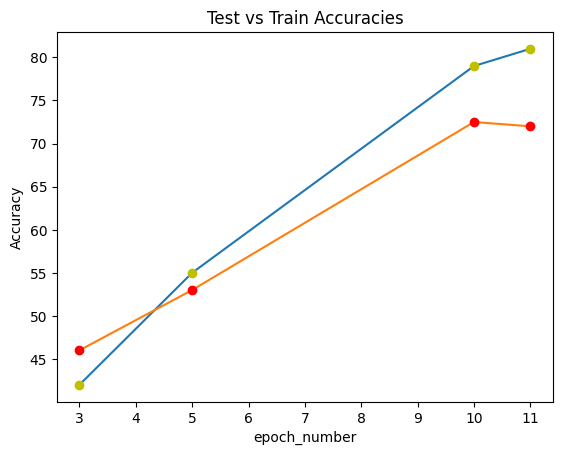

In [ ]:
import matplotlib.pyplot as plt

epochs = [3,5,10,11]
test = [46,53,72.5,72]
train  = [42,55,79,81]

fig, ax = plt.subplots()

ax.set(xlabel='epoch_number',
       ylabel='Accuracy',
       title='Test vs Train Accuracies')


ax.plot(epochs, train,
        epochs, train, "oy",label='train',)
ax.plot(
        epochs, test,
        epochs, test, "or",label='test')

plt.show()